### Anomaly Detection Mini Project
#### Corey Solitaire
`11.09.2020`

<div class="alert alert-block alert-info"><b></b></div>

#### Imports:

In [1]:

import wrangle
import explore
import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #to format dates on our plots
import seaborn as sns

# This is to make sure matplotlib doesn't throw the following error:
# The next line fixes "TypeError: float() argument must be a string or a number, not 'Timestamp' matplotlib"
pd.plotting.register_matplotlib_converters()

<div class="alert alert-block alert-info"><b></b></div>

### Import wrangle df:

In [2]:
# Returns complete df
df = wrangle.read_csv()
df = wrangle.wrangle_df(df)
df.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Teddy


In [3]:
# Return ds student df
ds = wrangle.ds_df(df)
ds.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2019-01-23 14:24:33,/,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada
2019-01-23 14:24:55,toc,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada
2019-01-23 14:24:58,html-css/introduction,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada
2019-01-23 14:25:07,html-css/introduction,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada
2019-01-23 14:25:17,html-css/elements,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada


In [4]:
# Returns webdev student df
web = wrangle.webdev_df(df)
web.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Teddy


****

<div class="alert alert-block alert-info"><b></b></div>

## First Step is to ID Cohorts:

explore.cohort_id(df, year, month, day, hour)
***

In [5]:
# 21,Sequoia,2017-09-27,2018-02-15,2
# Cohort ID #21 I think

#### Cohort Teddy

In [6]:
# 22,Teddy,2018-01-08,2018-05-17,2
# test = explore.cohort_id(df,2018,1,26,10)

In [7]:
# teddy = df[df.cohort_id == 22]
# len(teddy.user_id.unique())

#### Cohort Ulysses

In [8]:
# 23,Ulysses,2018-03-05,2018-07-19,2
# test = explore.cohort_id(df,2018,3,5,10)

In [9]:
# ulysses = df[df.cohort_id == 23]
# len(ulysses.user_id.unique())

#### Cohort Voyagers

In [10]:
# 24,Voyageurs,2018-05-29,2018-10-11,2
# test = explore.cohort_id(df,2018,5,29,10)

In [11]:
# voyagers = df[df.cohort_id == 24]
# len(voyagers.user_id.unique())

#### Cohort Wranglell

In [12]:
# 25,Wrangell,2018-07-23,2018-11-29,2
# test = explore.cohort_id(df,2018,7,23,10)

In [13]:
# wranglell = df[df.cohort_id == 25]
# len(wranglell.user_id.unique())

#### Cohort Xanadu

In [14]:
# 26,Xanadu,2018-09-17,2019-02-08,2
# test = explore.cohort_id(df,2018,9,17,10)

In [15]:
# xanadu = df[df.cohort_id == 26]
# len(xanadu.user_id.unique())

#### Cohort Yosemite

In [16]:
# 27,Yosemite,2018-11-05,2019-04-03,2
# test = explore.cohort_id(df,2018,11,5,10)

In [17]:
# yosemite = df[df.cohort_id == 27]
# len(yosemite.user_id.unique())

#### Staff

In [18]:
# 28,Staff,2014-02-04,2014-02-04,2
# staff = df[df.cohort_id == 28]
# len(staff.user_id.unique())

`Staff are listed under the webdev cohorts (2)`

****

#### Cohort Zion

In [19]:
# 29,Zion,2019-01-22,2019-06-04,2
# test = explore.cohort_id(df,2019,1,22,9)

In [20]:
# zion = df[df.cohort_id == 29]
# len(zion.user_id.unique())

#### Cohort Ada

`To determine Ada`
1. Identified Ada to be missing cohort_id, correct time span returned Nan
2. 75 user_id were missing cohort_id
3. Sorted user_id untill found id's that matched time period

In [21]:
# ada = df[df.cohort_id == 0]
# len(ada.user_id.unique())

In [22]:
# To find ada must find not ada first
# ada = ada[ada.user_id != 48]
# ada = ada[ada.user_id != 54]
# ada = ada[ada.user_id != 58]
# ada = ada[ada.user_id != 59]
# ada = ada[ada.user_id != 61]
# ada = ada[ada.user_id != 62]
# ada = ada[ada.user_id != 63]
# ada = ada[ada.user_id != 64]
# ada = ada[ada.user_id != 73]
# ada = ada[ada.user_id != 74]
# ada = ada[ada.user_id != 78]
# ada = ada[ada.user_id != 79]
# ada = ada[ada.user_id != 86]
# ada = ada[ada.user_id != 88]
# ada = ada[ada.user_id != 89]
# ada = ada[ada.user_id != 100]
# ada = ada[ada.user_id != 103]
# ada = ada[ada.user_id != 111]
# ada = ada[ada.user_id != 137]
# ada = ada[ada.user_id != 166]
# ada = ada[ada.user_id != 176]
# ada = ada[ada.user_id != 213]
# ada = ada[ada.user_id != 247]
# ada = ada[ada.user_id != 317]
# ada = ada[ada.user_id != 782]
# ada = ada[ada.user_id != 744]
# ada = ada[ada.user_id != 736]
# ada = ada[ada.user_id != 731]
# ada = ada[ada.user_id != 729]
# ada = ada[ada.user_id != 728]
# ada = ada[ada.user_id != 727]
# ada = ada[ada.user_id != 726]
# ada = ada[ada.user_id != 725]
# ada = ada[ada.user_id != 724]
# ada = ada[ada.user_id != 723]
# ada = ada[ada.user_id != 722]
# ada = ada[ada.user_id != 721]
# ada = ada[ada.user_id != 720]
# ada = ada[ada.user_id != 719]
# ada = ada[ada.user_id != 718]
# ada = ada[ada.user_id != 717]
# ada = ada[ada.user_id != 716]
# ada = ada[ada.user_id != 715]
# ada = ada[ada.user_id != 714]
# ada = ada[ada.user_id != 713]
# ada = ada[ada.user_id != 663]
# ada = ada[ada.user_id != 644]
# ada = ada[ada.user_id != 544]
# ada = ada[ada.user_id != 429]
# ada = ada[ada.user_id != 406]
# ada = ada[ada.user_id != 403]
# ada['cohort_id'] = ada['cohort_id'].replace(0,30)
# ada.head()

In [23]:
# len(ada)

In [24]:
# len(ada.user_id.unique())

#### Cohort: Andromeda

In [25]:
# 31,Andromeda,2019-03-18,2019-07-30,2
# andromeda = df[df.cohort_id == 31]
# len(andromeda.user_id.unique())

#### Cohort Betelgeuse

In [26]:
# 32,Betelgeuse,2019-05-28,2019-10-08,2
# betelgeuse = df[df.cohort_id == 32]
# len(betelgeuse.user_id.unique())

#### Cohort Ceres

In [27]:
# 33,Ceres,2019-07-15,2019-12-11,2
# ceres = df[df.cohort_id == 33]
# len(ceres.user_id.unique())

#### Cohort Bayes

In [28]:
# 34,Bayes,2019-08-19,2020-01-30,3
# bayes = df[df.cohort_id == 34]
# len(bayes.user_id.unique())

#### Cohort Deimos

In [29]:
# 51,Deimos,2019-09-16,2020-02-27,2
# deimos = df[df.cohort_id == 51]
# len(deimos.user_id.unique())

#### Cohort Europa

In [30]:
# 52,Europa,2019-11-04,2020-04-17,2
# europa = df[df.cohort_id == 52]
# len(europa.user_id.unique())

#### Cohort Fortuna

In [31]:
# 53,Fortuna,2020-01-13,2020-06-23,2
# fortuna = df[df.cohort_id == 53]
# len(fortuna.user_id.unique())

#### Cohort Curie

In [32]:
# 55,Curie,2020-02-03,2020-07-07,3
# curie = df[df.cohort_id == 55]
# len(curie.user_id.unique())

#### Cohort Apex

In [33]:
# 56,Apex,2020-02-24,2020-07-29,2
# apex = df[df.cohort_id == 56]
# len(apex.user_id.unique())

#### Cohort Ganymede

In [34]:
# 57,Ganymede,2020-03-23,2020-08-20,2
# ganymead = df[df.cohort_id == 57]
# len(ganymead.user_id.unique())

#### Cohort Hyperion

In [35]:
# 58,Hyperion,2020-05-26,2020-11-10,2
# hyperion = df[df.cohort_id == 58]
# len(hyperion.user_id.unique())

#### Cohort Darden

In [36]:
# 59,Darden,2020-07-13,2021-01-12,3
# darden = df[df.cohort_id == 59]
# len(darden.user_id.unique())

#### Cohort Io

In [37]:
# 60,Io,2020-07-20,2021-01-21,2
# io = df[df.cohort_id == 61]
# len(io.user_id.unique())

#### Cohort Bash

In [38]:
# 61,Bash,2020-07-20,2021-01-21,2
# bash = df[df.cohort_id == 0]
# bash = bash[bash.user_id != 48]
# bash = bash[bash.user_id != 54]
# bash = bash[bash.user_id != 58]
# bash = bash[bash.user_id != 59]
# bash = bash[bash.user_id != 61]
# bash = bash[bash.user_id != 62]
# bash = bash[bash.user_id != 63]
# bash = bash[bash.user_id != 64]
# bash = bash[bash.user_id != 73]
# bash = bash[bash.user_id != 74]
# bash = bash[bash.user_id != 78]
# bash = bash[bash.user_id != 79]
# bash = bash[bash.user_id != 86]
# bash = bash[bash.user_id != 88]
# bash = bash[bash.user_id != 89]
# bash = bash[bash.user_id != 100]
# bash = bash[bash.user_id != 103]
# bash = bash[bash.user_id != 111]
# bash = bash[bash.user_id != 137]
# bash = bash[bash.user_id != 166]
# bash = bash[bash.user_id != 176]
# bash = bash[bash.user_id != 213]
# bash = bash[bash.user_id != 247]
# bash = bash[bash.user_id != 317]
# bash = bash[bash.user_id != 663]
# bash = bash[bash.user_id != 644]
# bash = bash[bash.user_id != 544]
# bash = bash[bash.user_id != 429]
# bash = bash[bash.user_id != 406]
# bash = bash[bash.user_id != 403]
# bash = bash[bash.user_id != 349]
# bash = bash[bash.user_id != 350]
# bash = bash[bash.user_id != 351]
# bash = bash[bash.user_id != 352]
# bash = bash[bash.user_id != 353]
# bash = bash[bash.user_id != 354] 
# bash = bash[bash.user_id != 355]
# bash = bash[bash.user_id != 356] 
# bash = bash[bash.user_id != 357] 
# bash = bash[bash.user_id != 358] 
# bash = bash[bash.user_id != 359] 
# bash = bash[bash.user_id != 360]           
# bash = bash[bash.user_id != 361]
# bash = bash[bash.user_id != 362]
# bash = bash[bash.user_id != 363] 
# bash = bash[bash.user_id != 364]
# bash = bash[bash.user_id != 365]
# bash = bash[bash.user_id != 366]
# bash = bash[bash.user_id != 367]
# bash = bash[bash.user_id != 368]
# bash = bash[bash.user_id != 369]
# bash = bash[bash.user_id != 372]
# bash = bash[bash.user_id != 375]
# bash = bash[bash.user_id != 346]
# bash['cohort_id'] = bash['cohort_id'].replace(0,60)
# bash.head()

In [39]:
# len(bash.user_id.unique())

#### Cohort Jupyter

In [40]:
# 62,Jupiter,2020-09-21,2021-03-30,2
# jupyter = df[df.cohort_id == 62]
# len(jupyter.user_id.unique())

In [41]:
# jupyter.head()

In [42]:
# jupyter.tail()

#### Cohort Kalypso

In [43]:
# 132,Kalypso,2020-11-02,2021-05-04,2
# test = explore.cohort_id(df,2020,11,2,10)
# test.tail(100)

`No Evidence of Cohort in df`

****

## Takaway:

1. It appears that student_id numbers have changed over time.
2. Cohorts were created using best availiable data and are not 100% reliable
3. Anyone that was unable to be assigned to a cohort was lumped in to 'unknown'
4. 'unknown'is where I will be searching for malevolent actors and web scraping bots

<div class="alert alert-block alert-info"><b></b></div>

# Questions to Answer:
****
  1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


  2. Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 


  3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 


  4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? 


  5. At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 


  6. What topics are grads continuing to reference after graduation and into their jobs (for each program)? 


  7. Which lessons are least accessed? 


  8. Anything else I should be aware of? 

<div class="alert alert-block alert-info"><b></b></div>

## Question #1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?

****
#### First Step : Identify lessons per cohort

In [132]:
# Data Science:
ds.tail(1)

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int,fundimentals
datetime,,,,,,,,,,,,
2020-11-02 15:57:29,fundamentals/git,616,55.0,70.114.9.241,2020,11,2,15,Monday,1181878769,Curie,9536


In [108]:
ds_curriculum = pd.DataFrame({'fundimentals': [ds.page_viewed.str.contains('fundamentals').sum()],
                              'stats': [ds.page_viewed.str.contains('stats').sum()],
                              'sql': [ds.page_viewed.str.contains('sql').sum()],
                              'python': [ds.page_viewed.str.contains('python').sum()],
                              'regression': [ds.page_viewed.str.contains('regression').sum()],
                              'classification': [ds.page_viewed.str.contains('classification').sum()],
                              'clustering': [ds.page_viewed.str.contains('python').sum()],
                              'time_series': [ds.page_viewed.str.contains('time').sum() | ds.page_viewed.str.contains('series').sum()],
                              'anomoly_detection': [ds.page_viewed.str.contains('anomoly').sum() | ds.page_viewed.str.contains('detection').sum()],
                              'natural_language': [ds.page_viewed.str.contains('nlp').sum()],
                              'distributed_machine_learning': [ds.page_viewed.str.contains('distributed').sum()],
                              'storytelling': [ds.page_viewed.str.contains('story').sum() | ds.page_viewed.str.contains('telling').sum()],
                              'advanced_topics': [ds.page_viewed.str.contains('advanced').sum() | ds.page_viewed.str.contains('topics').sum()]},)
ds_curriculum

,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
0,9536,5263,9445,7502,6810,7364,7502,7999,2502,2020,1101,2431,1831


***
`Takeaway:`   
**1. Fundimentals is the most visited lesson, followed closely by sql**      
**2. Distributed machine learning and advanced topics were the least visited lesson**      

<div class="alert alert-block alert-info"><b></b></div>

In [133]:
#web dev
web.head(1)

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton


In [ ]:
web_curriculum = pd.DataFrame({'html': [web.page_viewed.str.contains('html').sum()],
                               'css': [web.page_viewed.str.contains('css').sum()],
                               'css': [web.page_viewed.str.contains('css').sum()],

In [136]:
web.page_viewed.str.contains('CSS').sum()

0

In [137]:
web.page_viewed.str.contains('css').sum()

76564

In [131]:
ds.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int,fundimentals
datetime,,,,,,,,,,,,
2019-01-23 14:24:33,/,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada,9536
2019-01-23 14:24:55,toc,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada,9536
2019-01-23 14:24:58,html-css/introduction,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada,9536
2019-01-23 14:25:07,html-css/introduction,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada,9536
2019-01-23 14:25:17,html-css/elements,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada,9536


In [ ]:
# ds curriculum page hits
ds_curriculum = pd.DataFrame(['fundimentals', 'stats', 'sql', 'python', 'regression', 'classification', 'clustering', 'time_series', 'anomoly_detection', 'natural_language', 'distributed_machine_leanring', 'storytelling', 'advancecd_topic'])

In [94]:
ds.page_viewed.str.contains('advancedtopics').sum()

0

In [95]:

ds.page_viewed.str.contains('advanced').sum() | ds.page_viewed.str.contains('topics').sum()

1831

In [81]:
ds.page_viewed.str.contains('distributed').sum()

1101

In [80]:
curie = ds[ds.cohort_id_int == 'Curie']
curie.tail(300)

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-10-26 12:51:50,search/search_index.json,617,55.0,64.250.9.181,2020,10,26,12,Monday,1090128309,Curie
2020-10-26 12:52:10,clustering/wrangle,617,55.0,64.250.9.181,2020,10,26,12,Monday,1090128309,Curie
2020-10-26 12:54:22,clustering/overview,617,55.0,64.250.9.181,2020,10,26,12,Monday,1090128309,Curie
2020-10-26 12:54:22,clustering/Hospital-Distance-Clusters.jpg,617,55.0,64.250.9.181,2020,10,26,12,Monday,1090128309,Curie
2020-10-26 12:54:57,classification/acquire,617,55.0,64.250.9.181,2020,10,26,12,Monday,1090128309,Curie
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 15:33:20,search/search_index.json,581,55.0,70.112.179.142,2020,11,2,15,Monday,1181791118,Curie
2020-11-02 15:33:27,advanced-topics/cross-validation,581,55.0,70.112.179.142,2020,11,2,15,Monday,1181791118,Curie
2020-11-02 15:57:22,/,616,55.0,70.114.9.241,2020,11,2,15,Monday,1181878769,Curie


<AxesSubplot:xlabel='Count', ylabel='variable'>

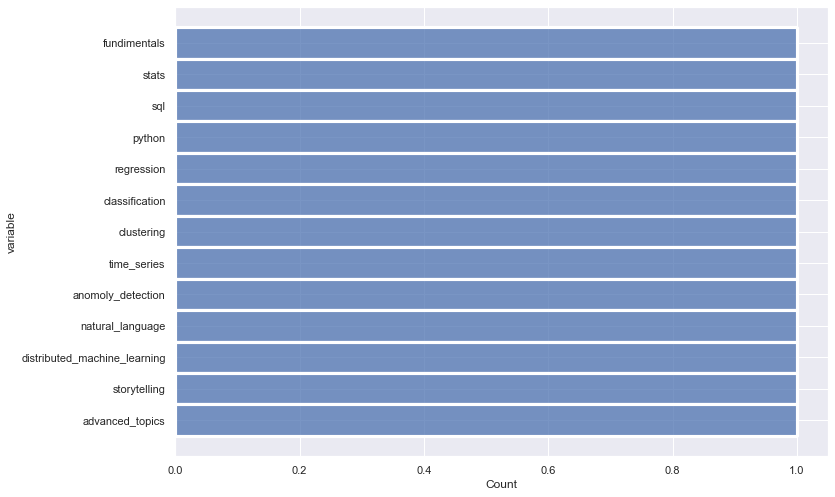

In [121]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=ds_curriculum, y= 'variable')
